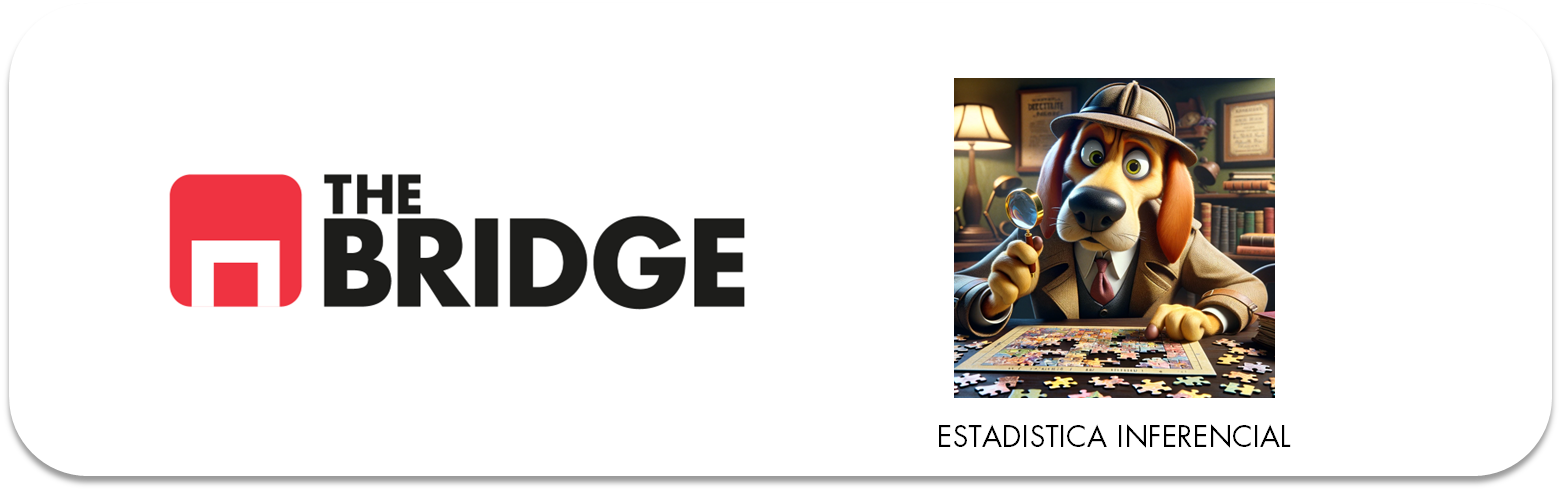

## INFERENCIAL (I): POBLACION, MUESTRA Y SESGO

### Población y muestra

Empecemos por unos conceptos básicos que ya conocíamos:

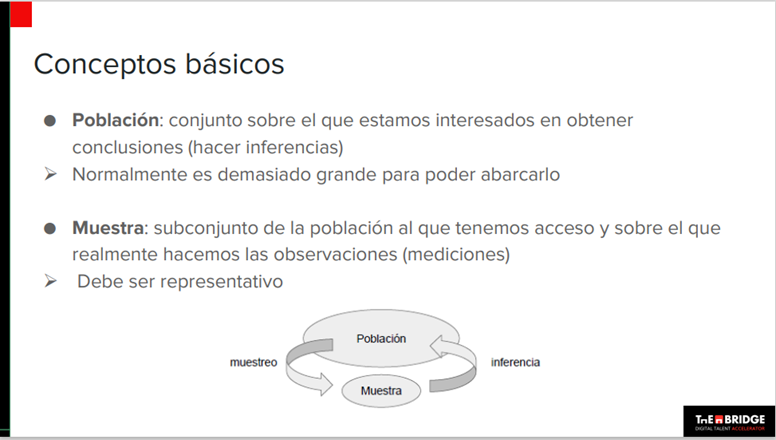

Lo que suele ocurrir es que no tenemos acceso a toda la población, bien porque es muy grande o bien porque en realidad queremos considerar no sólo los elementos actuales de la población sino los futuros también para poder hacer predicciones sobre ellos (por ejemplo, si quiero estimar el resultado de los partidos de fútbol de la semana que viene o el impacto de un medicamento en los futuros pacientes). 

En definitiva, a partir de ahora trabajaremos casi siempre con datos que consideraremos muestras de una población más amplia.

Para ilustrar estos conceptos y todos los de la unidad vamos a utilizar dos datasets:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df_titanic = pd.read_csv("./data/titanic.csv")
df_life_satisfaction = pd.read_csv("./data/lifesat_full.csv")

In [ ]:
df_life_satisfaction.head()

In [ ]:
len(df_titanic), len(df_life_satisfaction)

Realmente los dos son muestras de una población mayor, el dataset de Titanic tiene 891 registros de los dos mil y picos posibles (la población completa de todos los pasajeros que viajaron en él) y el dataset de nivel de satisfacción vital contiene datos de 36 países de los más de 190 países reconocidos en el mundo. En ese sentido ambos datasets son muestras de poblaciones mayores. 

**Lo importante de una muesta es que sea "REPRESENTATIVA" de la población de la que ha sido extraída**. Esto quiere decir que lo que podamos estudiar y deducir de los datos de la muestra podamos aplicarlo al resto de la población. De esa manera podremos hacer estimaciones, deducciones e inferencias sobre la población en general sin necesidad de tener todos los datos o estudiar la población completa.

### Muestra aleatoria

En general, cuando queremos estudiar una población de la que no podemos obtener todos los datos (por los motivos que sean) acudimos a obtener una muestra de la misma. La forma de obtener la muestra impacta en la representatividad de la misma y por lo tanto en la validez de las inferencias que hagamos de lo analizado sobre dicha muestra.

Para mantener en la muestra las propiedades de la población, es decir su representatividad, intentaremos obtener una muestra aleatoria (más adelante intentaremos que además sea estratificada, pero por ahora sólo que te suene). Es decir, escogiendo al azar los elementos que van a formar parte de nuestra muestra. Al proceso de obtención de una o varias muestras aleatorias se le denomina **muestreo aleatorio**.

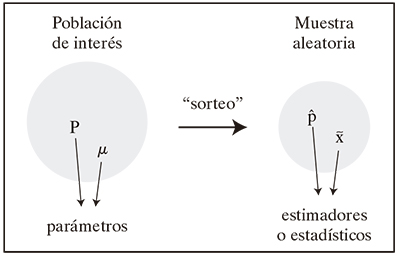

Como muestra la figura es como hacer un sorteo y escoger a los ganadores para la muestra. Vamos a verlo con nuestros datasets, suponiendo que estos sean TODA la población y no muestras. Obtengamos una muestra de cada uno de ellos de forma aleatoria aprovechando el método `sample` de pandas:

In [ ]:
num_muestras_titanic = int(len(df_titanic) * 0.2)
muestra_titanic = df_titanic.sample(num_muestras_titanic, random_state = 42)
print(f"Poblacion titanic: {len(df_titanic)} pasajeros")
print(f"Muestra titanic: {len(muestra_titanic)} pasajeros")

num_muestras_paises = int(len(df_life_satisfaction) * 0.2)
muestra_paises = df_life_satisfaction.sample(num_muestras_paises, random_state = 42)
print(f"Poblacion Indice Satifaccion: {len(df_life_satisfaction)} países")
print(f"Muestra titanic: {len(muestra_paises)} países")

En este ejemplo hemos obtenido dos muestras aleatorias (escogidas al azar) del 20% del tamaño de la población. ¿Y el tamaño importa? Sí, importa pero el tamaño no asegura la representatividad aunque la mejore.

Viendo los números de nuestro muestreo, ¿serán representativas nuestras muestras? Para poder contestar ahondemos en eso de la representatividad y en dos conceptos "nuevos": parámetros y estadísticos.

### Representatividad, parámetros y estadísticos

Nuestras muestras aleatorias serían representativas si sus características son muy muy parecidas a las de las población a la que "representan". Es decir, si las medidas que obtengamos sobre las muestras son parecidas a las que obtendríamos en la población. 

¿Y qué medidas? Pues las que vimos al tratar la estadística descriptiva y el análisis de datos en el módulo anterior. Sí, las medidas univariantes (frecuencias, medias, desviaciones), bivariantes, etc de una muestra deberían parecerse a las de la población para que podamos decir que esta es representativa.

Por ejemplo, comparemos el ratio de supervivencia en la muestra aleatoria y en la "población" total del dataset del titanic:

In [ ]:
fig,axs = plt.subplots(1,2,figsize = (10,8))

freq = df_titanic["alive"].value_counts(normalize = True)
axs[0].bar(x = freq.index, height = freq.values, label = "Poblacion")
axs[0].set_title("superviviencia poblacion")
axs[0].set_ylim(0,0.7)
freq_m = muestra_titanic["alive"].value_counts(normalize = True)
axs[1].bar(x = freq_m.index, height = freq_m.values, label = "Muestra")
axs[1].set_title("supervivencia muestra")
axs[1].set_ylim(0,0.7)

Se parecen pero hmmm, no del todo. Prueba tú a aumentar o disminuir el número de pasajeros en la muestra a ver qué ocurre.

Ahora comprobemos las medidas de tendencia central, posición y dispersión de la edad y el precio del ticket, por comparar variables numéricas:

In [ ]:
df_titanic_medidas = df_titanic[["age","fare"]].describe()
df_muestra_medidas = muestra_titanic[["age","fare"]].describe()

df_titanic_medidas.merge(df_muestra_medidas, left_index = True, right_index= True, suffixes= ["_pob","_muestra"])


Aquí hay más parecido "visual", pero todavía no podemos asegurarnos... Y eso que aquí podemos comparar muestra y población... Pero, lo normal no será tener la población (en cuyo caso no necesitamos la muestra), para esas situaciones para saber si las medidas son representativas acudiremos a... los test de hipótesis. Y lo veremos en las siguientes unidades. Antes apliquemos esto mismo al dataset de satisfacción vital y hablemos del sesgo.

In [ ]:
df_lifesat_medidas = df_life_satisfaction.describe()
df_muestra_medidas = muestra_paises.describe()

df_lifesat_medidas.merge(df_muestra_medidas, left_index= True, right_index= True, suffixes = ["_pob","_muestra"]).loc["mean"].T

Este es incluso más difícil, porque hay medias que se parecen y otras no mucho... Prueba de nuevo a aumentar los valores de muestras.

Cuando las medidas hacen referencia a la población (nuetros "_pob" en los ejemplos anteriores) se les llama **parámetros**. Cuando son las medidas hechas sobre las muestras, se les denomina **estadísticos**. Además para distinguirlos se les designa por letras diferentes:

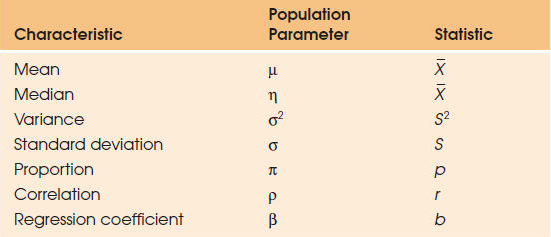

NOTA: La mediana de una muestra se representa por $\tilde x$ y la proporción en la población por $P$, en cuyo caso, la proporción en la muestra se representa por $\hat P$

### Sesgos

Se trata de una **distorsión no aleatoria que introducimos en la muestra como consecuencia de la selección de dicha muestra**. Si existe sesgo y no se controla, entonces, en general, haremos inferencias y deducciones erróneas a partir de la muestra. 

Por ejemplo, si realizamos una encuesta sobre cómo va el país, no será lo mismo si todos los encuestados son de una clase social determinada, o de un partido político concreto.

Para verlo, supongamos que escojemos nuestra muestra del titanic pero sin darnos cuenta lo hacemos únicamente sobre pasajeros de Cherbourgh, por ejemplo porque sólo teníamos datos de esa ciudad:

In [ ]:
muestra_sesgada = df_titanic.loc[df_titanic.embark_town == "Cherbourg"]

Si consideramos los estadísticos de nuestra como parámetros, veamos que error habríamos cometido, por ejemplo con el ratio de supervivencia:

In [ ]:
fig,axs = plt.subplots(1,2,figsize = (10,8))

freq = df_titanic["alive"].value_counts(normalize = True)
axs[0].bar(x = freq.index, height = freq.values, label = "Poblacion")
axs[0].set_title("superviviencia poblacion")
axs[0].set_ylim(0,0.7)
freq_m = muestra_sesgada["alive"].value_counts(normalize = True)
axs[1].bar(x = freq_m.index, height = freq_m.values, label = "Muestra")
axs[1].set_title("supervivencia muestra")
axs[1].set_ylim(0,0.7)

Como ya sabíamos hay una gran diferencia, tanto como para convertir al Titanic de una catastrofe a un accidente grave pero no tanto...

Por eso a la hora de seleccionar nuestra muestra debemos controlar mucho los posibles sesgos. Las implicaciones pueden ser mucho más impactantes incluso...

#### Otro ejemplo de sesgo: El sesgo de supervivencia

**El sesgo de supervivencia** (nada que ver con la supervivencia del Titanic) es un sesgo muy difícil de controlar ya que es el sesgo que se produce por tratar con los datos que tenemos y no con todos los posibles, porque son los datos que nos han llegado (que han sobrevivido). Dos ejemplos característicos son el estudio de los castillos y el de los aviones británicos en la segunda guerra mundial:




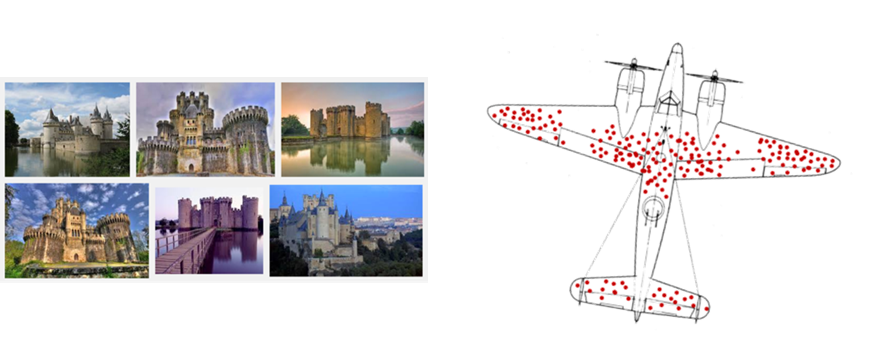





### Estadistica Inferencial

Para terminar recordar qué es lo que buscamos con la estadística inferencial frente a la estadística descriptiva:

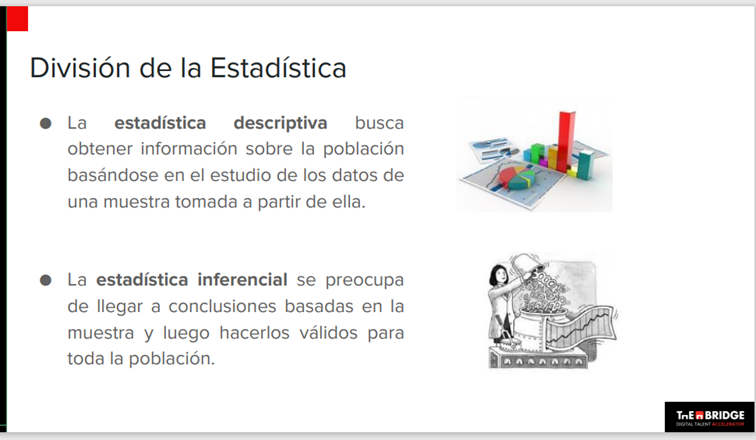